In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/data/insurance.csv")
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
target = "charges"

In [4]:
y = df[target]

In [5]:
X = df.drop(columns=target)

In [6]:
X.head()

,age,gender,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [9]:
X_dummy = pd.get_dummies(X, drop_first=True)
X_dummy

,age,bmi,children,gender_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0
1334,18,31.920,0,0,0,0,0,0
1335,18,36.850,0,0,0,0,1,0
1336,21,25.800,0,0,0,0,0,1


In [101]:
features = X_dummy.columns
features

Index(['age', 'bmi', 'children', 'gender_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [10]:
from sklearn import preprocessing, model_selection

In [58]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_dummy, y
                , test_size = 0.3, random_state = 1)

In [12]:
import numpy as np

In [57]:
np.random.seed(123)
np.random.randint(0, len(df), 4)

array([1122, 1041,  106, 1147])

In [59]:
len(X_train)/len(df)

0.6995515695067265

In [60]:
from sklearn import linear_model



In [61]:
est = linear_model.LinearRegression()

In [62]:
est.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
y_test_pred = est.predict(X_test)
y_train_pred = est.predict(X_train)

In [66]:
summary = pd.DataFrame({"y": y_test, "y_pred": y_test_pred})
summary["error"] = summary.y_pred - summary.y
summary

,y,y_pred,error
559,1646.42970,4610.315541,2963.885841
1087,11353.22760,12887.893880,1534.666280
1020,8798.59300,12573.948752,3775.355752
460,10381.47870,13197.836626,2816.357926
802,2103.08000,629.337182,-1473.742818
...,...,...,...
323,11566.30055,16224.053528,4657.752978
1268,1880.48700,3861.767583,1981.280583
134,2457.21115,3274.369325,817.158175
1274,17043.34140,27065.591340,10022.249940


In [67]:
SSE = (summary.error ** 2).sum()

In [68]:
SSE

14778105453.509327

In [69]:
MSE = (summary.error ** 2).mean()

In [70]:
MSE

36761456.352013245

In [71]:
RMSE = MSE ** 0.5
RMSE

6063.122656850449

In [72]:
from sklearn import metrics

In [74]:
rmse_test = metrics.mean_squared_error(y_test, y_test_pred) ** 0.5

In [75]:
rmse_test

6063.12265685045

In [78]:
rmse_train = metrics.mean_squared_error(y_train, y_train_pred) ** 0.5

In [79]:
rmse_train

6039.6018713245385

In [83]:
SST = ((y_test - y_train.mean()) ** 2).sum()

In [85]:
r2_test = 1 - SSE/SST
r2_test

0.7405997304511027

In [86]:
metrics.r2_score(y_test, y_test_pred)

0.7405989316927212

In [87]:
SST = ((y_test - y_test.mean()) ** 2).sum()
r2_test = 1 - SSE/SST
r2_test

0.7405989316927213

In [88]:
metrics.r2_score(y_train, y_train_pred)

0.7545557492633161

In [89]:
metrics.r2_score(y_test, y_test_pred)

0.7405989316927212

In [91]:
import matplotlib.pyplot as plt

%matplotlib inline

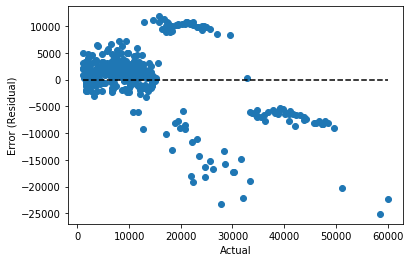

In [95]:
plt.scatter(y_test, summary.error)
plt.xlabel("Actual")
plt.ylabel("Error (Residual)")

plt.hlines([0], y_test.min(), y_test.max(), ls = "--")

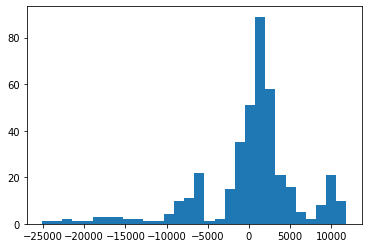

In [97]:
plt.hist(summary.error, bins = 30);

In [98]:
est.coef_

array([  251.68186515,   322.38910684,   344.9642553 ,  -282.79634661,
       24059.39047692,  -304.09009765,  -939.34209691,  -868.18855866])

In [99]:
est.intercept_

-11039.23841856155

In [102]:
pd.DataFrame({"feature": features, "coeff": est.coef_})

,feature,coeff
0,age,251.681865
1,bmi,322.389107
2,children,344.964255
3,gender_male,-282.796347
4,smoker_yes,24059.390477
5,region_northwest,-304.090098
6,region_southeast,-939.342097
7,region_southwest,-868.188559


In [103]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [104]:
X_train_std = scaler.transform(X_train)

In [105]:
X_test_std = scaler.transform(X_test)

In [106]:
est.fit(X_train_std, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [107]:
y_test_pred = est.predict(X_test_std)
y_train_pred = est.predict(X_train_std)

In [108]:
metrics.r2_score(y_train, y_train_pred), metrics.r2_score(y_test, y_test_pred)

(0.7545557492633161, 0.7405989316927211)

In [109]:
est.intercept_

13276.698553898505

In [110]:
pd.DataFrame({"feature": features, "coeff": est.coef_})

,feature,coeff
0,age,3528.982731
1,bmi,1961.655208
2,children,421.550164
3,gender_male,-141.359110
4,smoker_yes,9733.786883
5,region_northwest,-129.545886
6,region_southeast,-414.541483
7,region_southwest,-379.095344


In [112]:
pd.DataFrame(X_train_std, columns=features)

,age,bmi,children,gender_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0.797152,-0.702114,-0.904002,0.976766,-0.509664,1.788102,-0.600387,-0.587220
1,-1.271085,-0.703758,-0.085679,-1.023787,-0.509664,-0.559252,-0.600387,1.702939
2,-0.985811,-0.733340,-0.904002,0.976766,-0.509664,-0.559252,-0.600387,-0.587220
3,0.797152,-0.414510,1.550967,-1.023787,-0.509664,-0.559252,1.665591,-0.587220
4,0.868471,1.482037,-0.085679,0.976766,-0.509664,-0.559252,-0.600387,1.702939
...,...,...,...,...,...,...,...,...
931,1.510338,-0.292894,-0.904002,0.976766,-0.509664,-0.559252,-0.600387,1.702939
932,-0.914493,-0.218117,0.732644,-1.023787,-0.509664,-0.559252,-0.600387,-0.587220
933,0.868471,0.703039,0.732644,-1.023787,1.962076,-0.559252,-0.600387,-0.587220
934,0.083967,-1.390722,0.732644,-1.023787,1.962076,-0.559252,1.665591,-0.587220


In [113]:
pd.DataFrame(X_train_std, columns=features).describe()

,age,bmi,children,gender_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02
mean,-1.791065e-16,-4.635418e-16,-2.910332e-16,1.767342e-17,8.979047e-17,-1.088873e-16,4.886879e-17,-2.372271e-17
std,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00
min,-1.485041e+00,-2.419524e+00,-9.040023e-01,-1.023787e+00,-5.096643e-01,-5.592522e-01,-6.003875e-01,-5.872202e-01
25%,-9.144925e-01,-7.247116e-01,-9.040023e-01,-1.023787e+00,-5.096643e-01,-5.592522e-01,-6.003875e-01,-5.872202e-01
50%,-5.867016e-02,-3.076297e-02,-8.567913e-02,9.767656e-01,-5.096643e-01,-5.592522e-01,-6.003875e-01,-5.872202e-01
75%,8.684707e-01,6.631857e-01,7.326440e-01,9.767656e-01,-5.096643e-01,-5.592522e-01,1.665591e+00,1.702939e+00
max,1.795612e+00,3.689196e+00,3.187613e+00,9.767656e-01,1.962076e+00,1.788102e+00,1.665591e+00,1.702939e+00
